<a href="https://colab.research.google.com/github/Zamariolo/Datasets/blob/master/Isolamento_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de isolamento da cidade de Mogi Guaçu

In [0]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [0]:
#Importando o dataset e ajustando para formato numérico
dataset = pd.read_csv('https://raw.githubusercontent.com/Zamariolo/Datasets/master/isolamento.csv')

#Transforma a coluna taxa de isolamento (str) em formato numérico
isolamento_str = dataset['Índice de isolamento']
isolamento_num = []
for i in isolamento_str:
  num = float(i[:-1])/100.0
  isolamento_num.append(num)

dataset['isolamento_num'] = isolamento_num

In [0]:
#Inserindo o dia da semana nos dados
DIAS = ['Segunda-feira','Terça-feira','Quarta-feira','Quinta-Feira','Sexta-feira','Sábado','Domingo']
dia_da_semana = []

for data in dataset['DATA']:
  dia = data[:2]
  mes = data[3:5]
  ano = data[6:]
  diaSemana = date(year=int(ano), month=int(mes), day=int(dia)).weekday()
  dia_da_semana.append(DIAS[diaSemana])

dataset['Dia da semana'] = dia_da_semana
dataset.head(10)

,Unnamed: 0,Cdufmun,Município,DATA,Número de registros,População,UF,Índice de isolamento,isolamento_num,Dia da semana
0,0,3530706,Mogi Guaçu,05/03/2020,1,151888,SP,40%,0.40,Quinta-Feira
1,1,3530706,Mogi Guaçu,06/03/2020,1,151888,SP,38%,0.38,Sexta-feira
2,2,3530706,Mogi Guaçu,12/03/2020,1,151888,SP,35%,0.35,Quinta-Feira
3,3,3530706,Mogi Guaçu,13/03/2020,1,151888,SP,37%,0.37,Sexta-feira
4,4,3530706,Mogi Guaçu,17/03/2020,1,151888,SP,43%,0.43,Terça-feira
5,5,3530706,Mogi Guaçu,18/03/2020,1,151888,SP,42%,0.42,Quarta-feira
6,6,3530706,Mogi Guaçu,19/03/2020,1,151888,SP,44%,0.44,Quinta-Feira
7,7,3530706,Mogi Guaçu,20/03/2020,1,151888,SP,46%,0.46,Sexta-feira
8,8,3530706,Mogi Guaçu,21/03/2020,1,151888,SP,58%,0.58,Sábado
9,9,3530706,Mogi Guaçu,22/03/2020,1,151888,SP,57%,0.57,Domingo


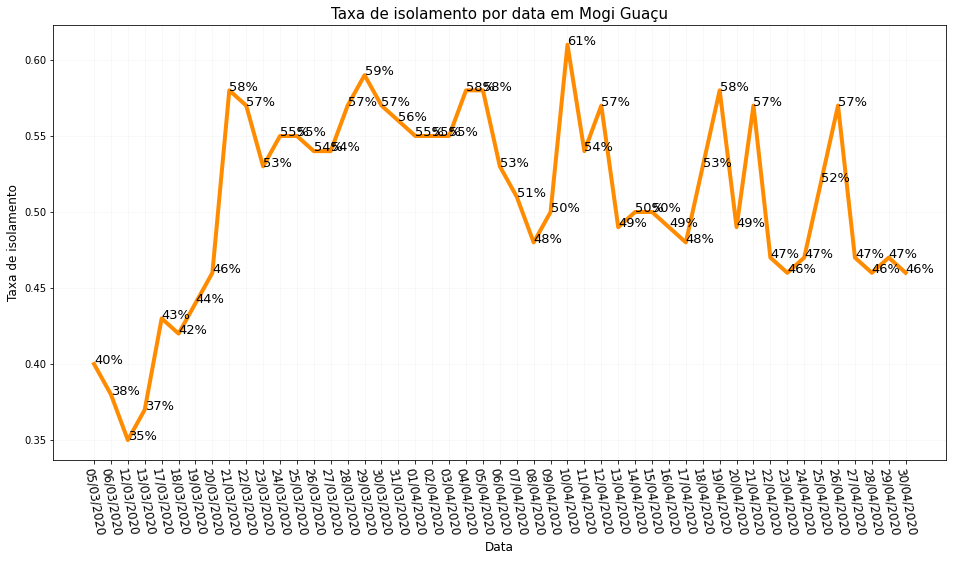

In [0]:
plt.figure(figsize=(16,8))
plt.plot(dataset.DATA, dataset['isolamento_num'], linewidth=4, color='darkorange')
plt.grid(alpha=0.1)
plt.ylabel("Taxa de isolamento", fontsize=12)
plt.xlabel("Data", fontsize=12)
plt.xticks(dataset.DATA, rotation=280, fontsize=12)
plt.title("Taxa de isolamento por data em Mogi Guaçu", fontsize=15)

#Texto
for i in range(len(dataset.DATA)):
    plt.text(dataset.DATA.iloc[i], dataset.isolamento_num.iloc[i], ("%.0f%%" %(dataset.isolamento_num.iloc[i]*100)), fontsize=13, color='black')

# Quem coleta e como são coletados os dados de isolamento em Mogi Guaçu?

Os dados são coletados pelo Sistema de Monitoramento Inteligente do Governo de São Paulo em parceria com as operadoras de telefonia Vivo, Claro, Oi e TIM, que analisa os dados de telefonia móvel, de forma anonima e agrupada, sem desrespeitar a privacidade dos usuários.

Os dados aqui utilizados são obtidos diretamente pelo link: https://www.saopaulo.sp.gov.br/coronavirus/isolamento



# Quais são as informações contidas nestes dados?

In [0]:
dataset.head()

,Unnamed: 0,Cdufmun,Município,DATA,Número de registros,População,UF,Índice de isolamento,isolamento_num,Dia da semana
0,0,3530706,Mogi Guaçu,05/03/2020,1,151888,SP,40%,0.40,Quinta-Feira
1,1,3530706,Mogi Guaçu,06/03/2020,1,151888,SP,38%,0.38,Sexta-feira
2,2,3530706,Mogi Guaçu,12/03/2020,1,151888,SP,35%,0.35,Quinta-Feira
3,3,3530706,Mogi Guaçu,13/03/2020,1,151888,SP,37%,0.37,Sexta-feira
4,4,3530706,Mogi Guaçu,17/03/2020,1,151888,SP,43%,0.43,Terça-feira




*   **Cdufmun**: Código federal do munícipio;
*   **Munícipio**: Nome do munícipio;
*   **DATA**: dia, mês e ano da informação;
*   **População**: população estimada pelo IBGE para o ano de 2020 (151888 pessoas);
*   **Índice de isolamento**: Taxa de pessoas que permanecerem em casa segundo dados do SIMI-SP;
*   **isolamento_num**: Taxa de isolamento em formato numérico;
*   **Dia da semana**: Dia da semana (segunda, terça, etc...) da informação coletada.



# Quando o isolamento começou a ser monitorado em Mogi Guaçu?

In [0]:
dataset.DATA.min()

'01/04/2020'

Dia 01/04/2020

# Qual foi a média de isolamento em Mogi Guaçu desde o primeiro dia de monitoramento?

In [0]:
dataset['isolamento_num'].mean()
print("O isolamento médio, considerando todos os dados coletados desde o dia %s é de %.2f%%" %(dataset.DATA.min(),dataset['isolamento_num'].mean()*100))

O isolamento médio, considerando todos os dados coletados desde o dia 01/04/2020 é de 50.88%


# Qual foi a taxa de isolamento média nos últimos 7 dias?

In [0]:
#Tirando valores medios dos ultimos 7 dias
ultimo7 = dataset.iloc[-7:, :]
mediaIsolamento = ultimo7.isolamento_num.mean()
populacao = dataset['População'].min()
print("Taxa de isolamento média dos últimos 7 dias: %.2f%%" %(mediaIsolamento*100))
print("Número de pessoas médias em isolamento nos últimos 7 dias: %.0f pessoas" %(populacao*mediaIsolamento))
print("Número de pessoas médias circulando nas ruas nos últimos 7 dias: %.0f pessoas" %(populacao*(1-mediaIsolamento)))
print("\n Obs: Considerando a população estimada de 151888 habitantes")

Taxa de isolamento média dos últimos 7 dias: 48.86%
Número de pessoas médias em isolamento nos últimos 7 dias: 74208 pessoas
Número de pessoas médias circulando nas ruas nos últimos 7 dias: 77680 pessoas

 Obs: Considerando a população estimada de 151888 habitantes


# Quais dias Mogi Guaçu obteve as maiores taxas de isolamento?

In [0]:
dataset.sort_values('isolamento_num', ascending=False)[['DATA', 'Índice de isolamento']].head(10)

,DATA,Índice de isolamento
28,10/04/2020,61%
16,29/03/2020,59%
37,19/04/2020,58%
23,05/04/2020,58%
22,04/04/2020,58%
8,21/03/2020,58%
39,21/04/2020,57%
15,28/03/2020,57%
30,12/04/2020,57%
44,26/04/2020,57%


# Finais de semana apresentam taxa de isolamento maior que nos dias de semana?



Considerando todos os dados coletados (desde dia 01/04/2020):
Taxa de isolamento média nos finais de semana: 56.50%
Taxa de isolamento média nos dias uteis: 49.05%


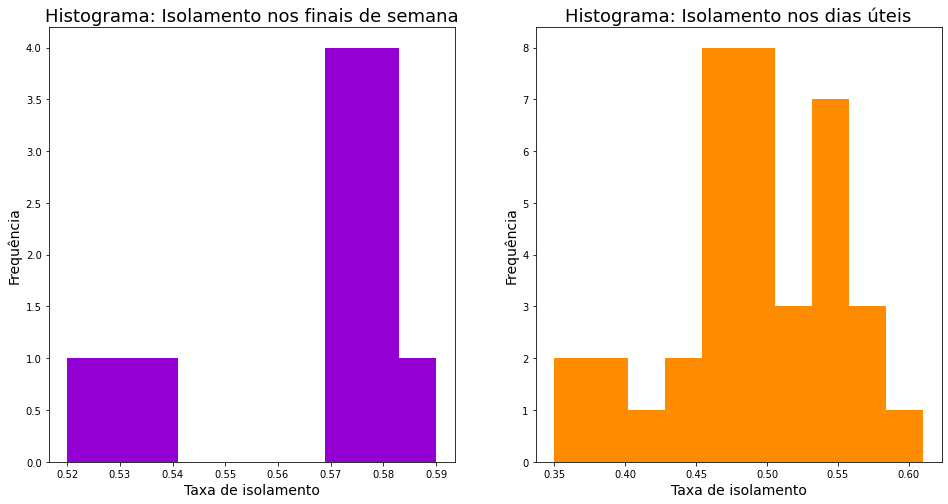

In [0]:
isolamentoFds = dataset[dataset['Dia da semana'].isin(['Sábado', 'Domingo'])]['isolamento_num']
isolamentoDiaUtil = dataset[~dataset['Dia da semana'].isin(['Sábado', 'Domingo'])]['isolamento_num']

print("Considerando todos os dados coletados (desde dia %s):" %dataset.DATA.min())
print("Taxa de isolamento média nos finais de semana: %.2f%%" %(isolamentoFds.mean()*100))
print("Taxa de isolamento média nos dias uteis: %.2f%%" %(isolamentoDiaUtil.mean()*100))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Histograma: Isolamento nos finais de semana", fontsize=18)
plt.ylabel("Frequência", fontsize=14)
plt.xlabel("Taxa de isolamento", fontsize=14)
plt.hist(isolamentoFds, color='darkviolet')

plt.subplot(1,2,2)
plt.title("Histograma: Isolamento nos dias úteis", fontsize=18)
plt.ylabel("Frequência", fontsize=14)
plt.xlabel("Taxa de isolamento", fontsize=14)
plt.hist(isolamentoDiaUtil, color='darkorange')
plt.show()